### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), 
                      scale = df.market_value.std(),
                     size = len(df))

In [6]:
df['wn'] = wn
df.head()

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


market_value           wn
date                                 
1994-01-07        469.90  1455.711145
1994-01-10        475.27  1094.130010
1994-01-11        474.13  1330.898643
1994-01-12        474.17  1053.508153
1994-01-13        472.47  1161.490421

In [7]:
df.describe()

market_value           wn
count   5021.000000  5021.000000
mean    1091.651926  1097.276120
std      292.559287   294.298446
min      438.920000    93.860187
25%      914.620000   899.378059
50%     1144.650000  1097.647669
75%     1316.280729  1292.168616
max     1570.252238  2295.212000

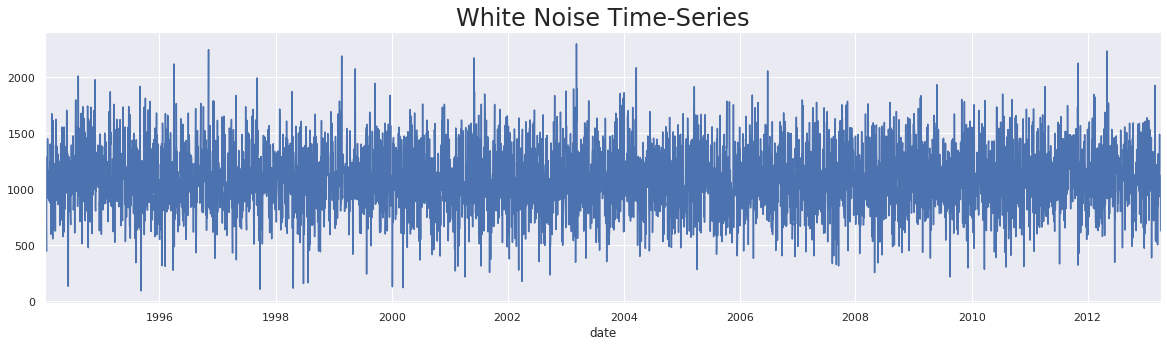

In [8]:
df.wn.plot(figsize = (20,5))
plt.title('White Noise Time-Series', size = 24);

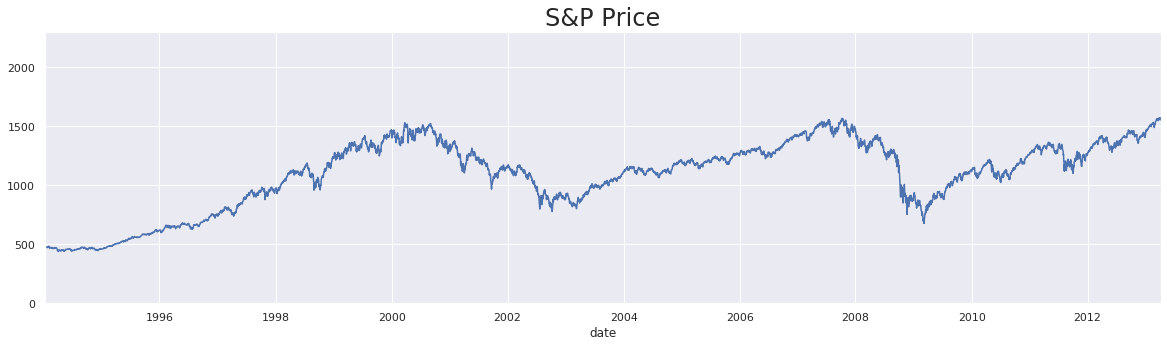

In [9]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P Price', size = 24)
plt.ylim(0,2300);

### Random Walk

In [10]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [11]:
rw.describe()

price
count  5021.000000
mean   1269.944293
std     444.216793
min     585.483034
25%     931.550429
50%    1156.363045
75%    1488.362029
max    2715.508720

In [12]:
df['rw'] = rw.price

/home/mariusz/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

market_value           wn           rw
date                                              
1994-01-07        469.90  1455.711145  1122.139662
1994-01-10        475.27  1094.130010  1080.347860
1994-01-11        474.13  1330.898643  1082.095245
1994-01-12        474.17  1053.508153  1083.639265
1994-01-13        472.47  1161.490421  1067.146255

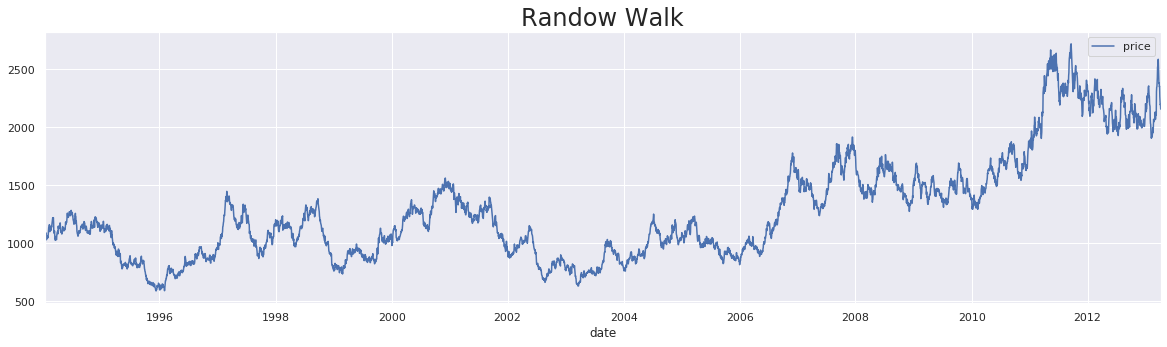

In [14]:
rw.plot(figsize= (20,5))
plt.title('Randow Walk', size=24);

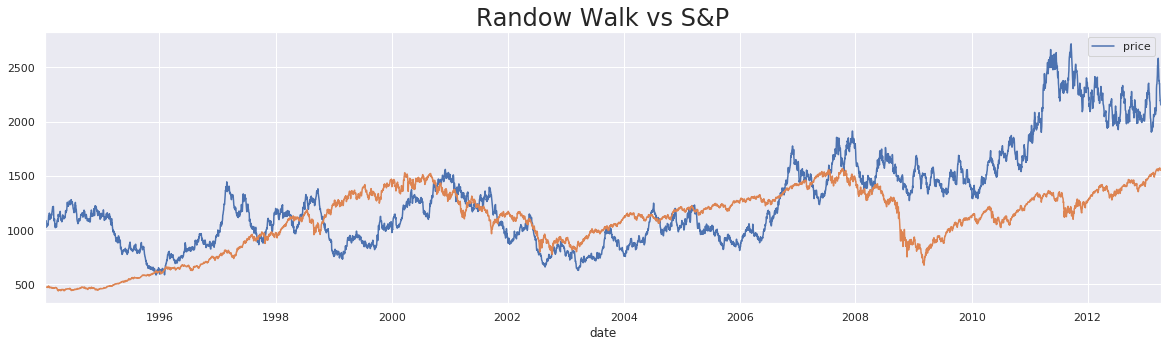

In [15]:
rw.plot(figsize= (20,5))
df.market_value.plot()
plt.title('Randow Walk vs S&P', size=24);

### Stationarity

In [16]:
sts.adfuller(df['market_value'])
# wartość p = 0,4121..... czyli nie mamy wystarczającego dowodu, żeby udowodnić, że 
# ten szereg czasowy jest stacjonarny

(-1.7369847452352438,
 0.4121645696770621,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [17]:
sts.adfuller(df.wn)
# niskie p-value - szereg jest stacjonarny

(-69.67503445539703,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70875.14359193287)

In [18]:
sts.adfuller(df.rw)
# wartość p = 0,6159..... czyli nie mamy wystarczającego dowodu, żeby udowodnić, że 
# ten szereg czasowy jest stacjonarny, jest ok 60% szansa że dane pochodzą od nie 
# stacjonarnego procesu

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

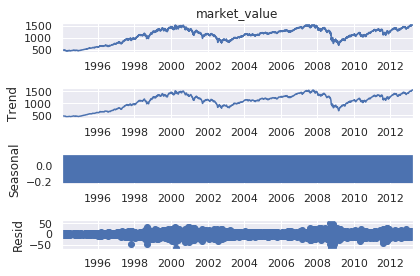

In [19]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot();

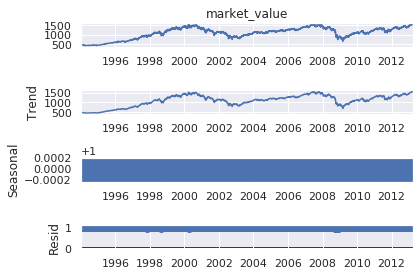

In [20]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_multiplicative.plot();

### ACF

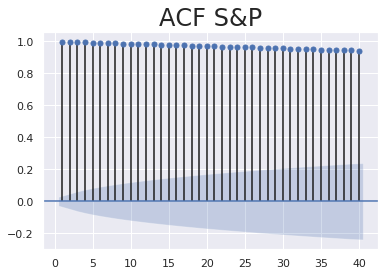

In [21]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title('ACF S&P', size=24);

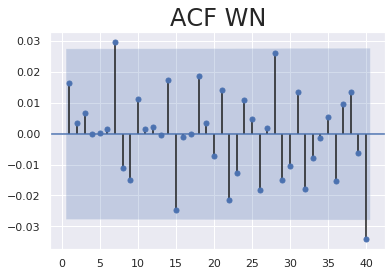

In [23]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title('ACF WN', size=24);

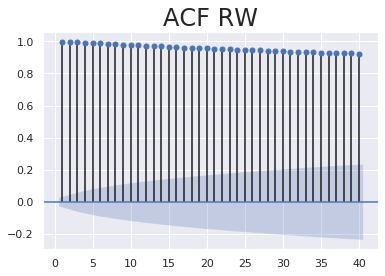

In [24]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title('ACF RW', size=24);

### PACF

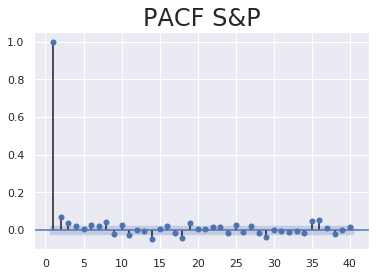

In [25]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title('PACF S&P', size=24);

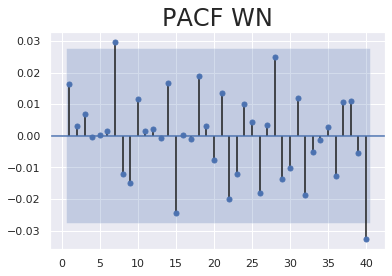

In [26]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title('PACF WN', size=24);

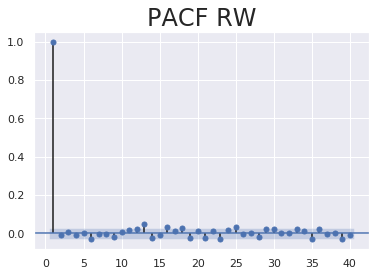

In [27]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))
plt.title('PACF RW', size=24);